In [71]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [72]:
# Webscrapping Wikipedia table to get the IBEX 35 components
page = requests.get("https://en.wikipedia.org/wiki/IBEX_35")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table',id='components',class_="wikitable sortable")

In [73]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Ticker,Company,Sector
0,ACS,ACS,Construction
1,ACX,Acerinox,Steel
2,AENA,Aena,Aviation
3,AMS,Amadeus IT Group,Tourism
4,ANA,Acciona,Construction
5,ANE,Acciona Energía,Energy
6,BBVA,BBVA,Financial Services
7,BKT,Bankinter,Financial Services
8,CABK,CaixaBank,Financial Services
9,CLNX,Cellnex Telecom,Telecommunications


In [74]:
# Add .MC to all Tickers to use them on Yahoo Finance
wiki['Ticker'] = wiki['Ticker'].apply(lambda x: x+'.MC')
wiki.head(35)

,Ticker,Company,Sector
0,ACS.MC,ACS,Construction
1,ACX.MC,Acerinox,Steel
2,AENA.MC,Aena,Aviation
3,AMS.MC,Amadeus IT Group,Tourism
4,ANA.MC,Acciona,Construction
5,ANE.MC,Acciona Energía,Energy
6,BBVA.MC,BBVA,Financial Services
7,BKT.MC,Bankinter,Financial Services
8,CABK.MC,CaixaBank,Financial Services
9,CLNX.MC,Cellnex Telecom,Telecommunications


In [75]:
# Get the data for the stock ^IBEX
ibex35_list = wiki['Ticker'].tolist()
ibex35_list.append('^IBEX')

In [76]:
# Save all the historical data
for stock in tqdm(ibex35_list):
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

100%|██████████| 36/36 [00:11<00:00,  3.19it/s]


In [77]:
# Configuration of different parameters of the notebook
ticker = 'BBVA.MC'
year = '2024'

In [78]:
# Check DataFrame
stock_ibex = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ibex.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,13.690602,13.757854,13.594527,13.623349,4.656137,8244257
2000-01-04,13.450416,13.536882,13.219837,13.267874,4.534644,8522096
2000-01-05,13.142977,13.210230,12.912399,12.970044,4.432853,12159826
2000-01-06,12.970044,12.970044,12.970044,12.970044,4.432853,0
2000-01-07,13.248659,13.248659,12.998866,13.133370,4.488673,62261944
2000-01-10,13.277482,13.277482,12.902791,12.922006,4.416436,58740351
2000-01-11,12.873969,12.893184,12.537709,12.662605,4.327778,6761292
2000-01-12,12.643391,12.643391,12.393597,12.518494,4.313643,8266754
2000-01-13,12.489672,12.537709,12.105374,12.211056,4.207706,9372669


In [79]:
# Check DataFrame tail
stock_ibex.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-17,8.050,8.112,7.994,8.094,8.094,9189726
2024-01-18,8.100,8.156,8.038,8.084,8.084,12720401
2024-01-19,8.140,8.140,7.974,7.996,7.996,8020369
2024-01-22,8.094,8.172,8.046,8.172,8.172,8136043
2024-01-23,8.184,8.198,8.064,8.134,8.134,7526002
2024-01-24,8.142,8.226,8.106,8.226,8.226,5783214
2024-01-25,8.186,8.188,8.010,8.090,8.090,7480872
2024-01-26,8.112,8.128,8.052,8.092,8.092,7031754
2024-01-29,8.106,8.154,7.998,8.114,8.114,7393341


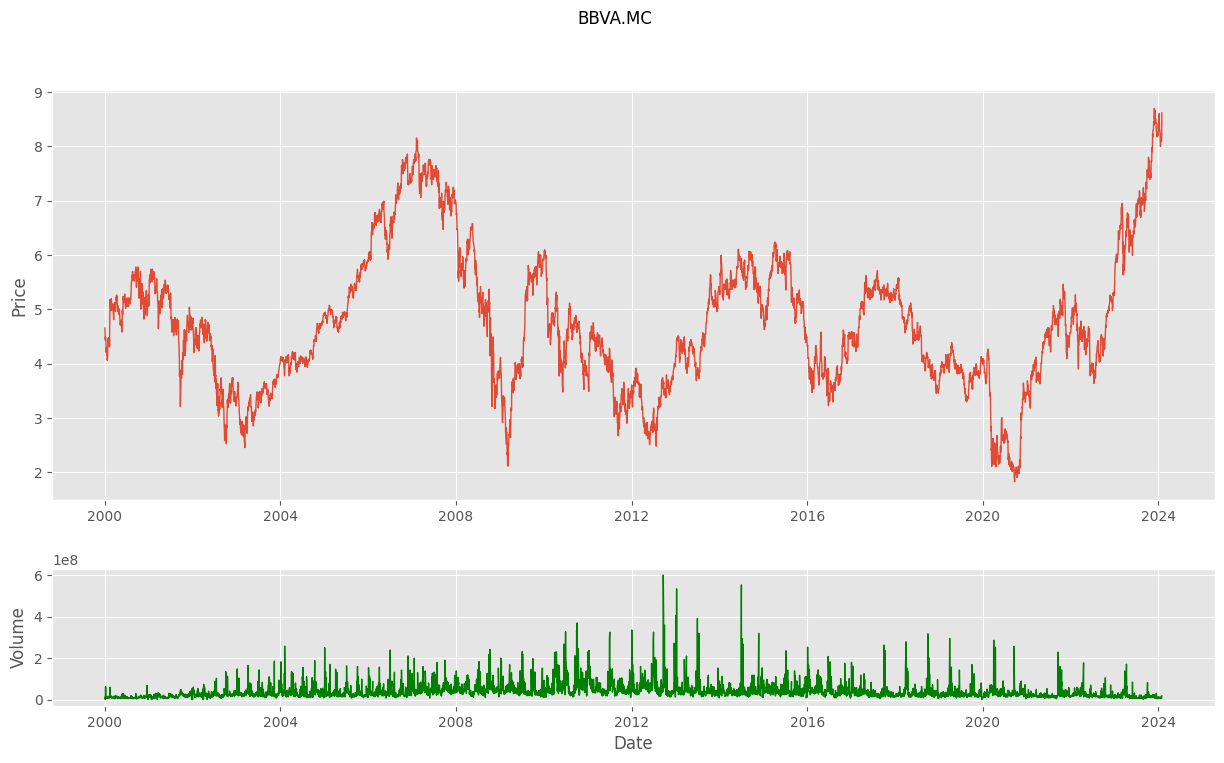

In [80]:
# Plot the adjusted close price of the ^IBEX
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ibex['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ibex['Volume'],linewidth=1,color='g')

plt.show()

In [81]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ibex.index,y=stock_ibex['Adj Close'],mode="lines",name='IBEX35'),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ibex.index,y=stock_ibex['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [82]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ibex['MMA20'] = stock_ibex['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ibex["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ibex['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ibex['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ibex["Adj Close"].loc[year], window=14)

# RSI
stock_ibex['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ibex['Daily_Return'] = daily_return(stock_ibex["Adj Close"].loc[year])

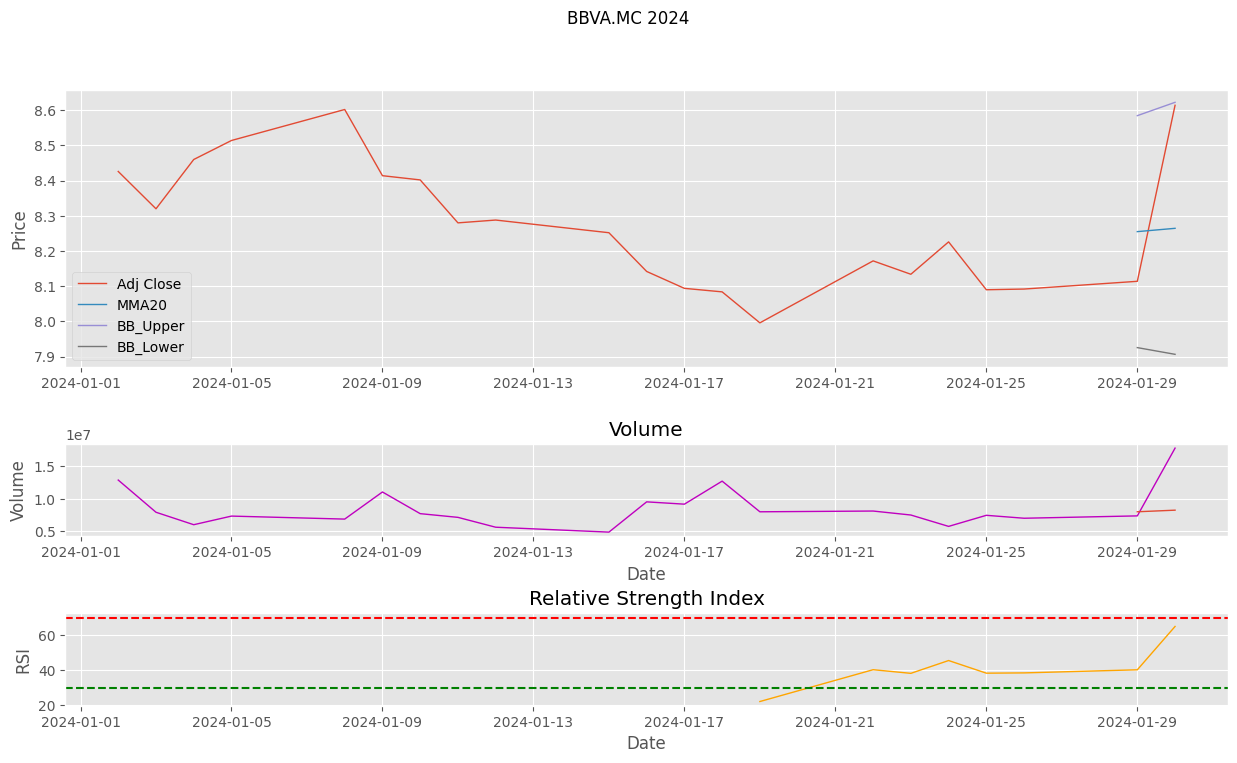

In [83]:
# Plot the adjusted close price of the ^IBEX for year
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ibex['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ibex['MMA20'],linewidth=1) 
axs[0].plot(stock_ibex['BB_Upper'],linewidth=1)
axs[0].plot(stock_ibex['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ibex['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ibex['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ibex['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [84]:
# Plot the adjusted close price of the ^IBEX for year
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ibex['Adj Close'].loc[year].index,y=stock_ibex['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ibex['BB_Lower'].loc[year].index,y=stock_ibex['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ibex['BB_Upper'].loc[year].index,y=stock_ibex['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ibex['MMA20'].loc[year].index,y=stock_ibex['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ibex['Volume'].loc[year].index,y=stock_ibex['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ibex['Volume'].loc[year].index,y=stock_ibex['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ibex['RSI'].loc[year].index,y=stock_ibex['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [85]:
stock_ibex.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-01-17,8.050,8.112,7.994,8.094,8.094,9189726,NaN,NaN,NaN,NaN,-0.589540
2024-01-18,8.100,8.156,8.038,8.084,8.084,12720401,NaN,NaN,NaN,NaN,-0.123551
2024-01-19,8.140,8.140,7.974,7.996,7.996,8020369,NaN,NaN,NaN,22.151368,-1.088568
2024-01-22,8.094,8.172,8.046,8.172,8.172,8136043,NaN,NaN,NaN,40.272486,2.201102
2024-01-23,8.184,8.198,8.064,8.134,8.134,7526002,NaN,NaN,NaN,38.204692,-0.465004
2024-01-24,8.142,8.226,8.106,8.226,8.226,5783214,NaN,NaN,NaN,45.500584,1.131055
2024-01-25,8.186,8.188,8.010,8.090,8.090,7480872,NaN,NaN,NaN,38.301554,-1.653291
2024-01-26,8.112,8.128,8.052,8.092,8.092,7031754,NaN,NaN,NaN,38.455756,0.024720
2024-01-29,8.106,8.154,7.998,8.114,8.114,7393341,8.2551,8.584539,7.925660,40.225643,0.271877


100%|██████████| 36/36 [00:00<00:00, 52.34it/s]


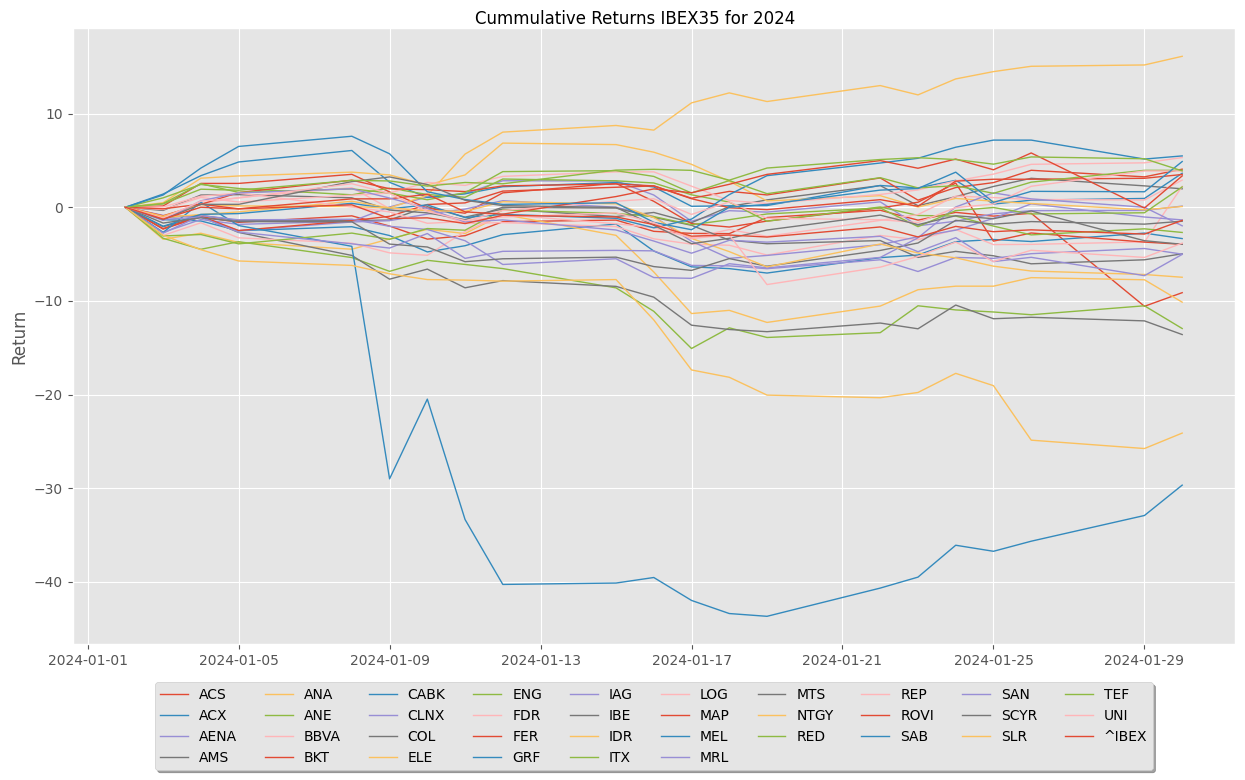

In [86]:
# Plot Cummulative Returns ^IBEX for year
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(ibex35_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [87]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(ibex35_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns IBEX35 for {year}")

fig.show()

100%|██████████| 36/36 [00:00<00:00, 46.71it/s]


In [88]:
# Create also table of cummulative returns
list = []

for stock in tqdm(ibex35_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Company']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


100%|██████████| 36/36 [00:00<00:00, 56.25it/s]


,Ticker,Company,Date,Cummulative_Return
0,IDR.MC,Indra,2024-01-30,16.122162
1,MEL.MC,Meliá Hotels,2024-01-30,5.485229
2,LOG.MC,Logista,2024-01-30,5.309733
3,SAB.MC,Banco Sabadell,2024-01-30,4.882301
4,FER.MC,Ferrovial,2024-01-30,4.066704
5,RED.MC,Red Eléctrica,2024-01-30,3.944069
6,TEF.MC,Telefónica,2024-01-30,3.886440
7,REP.MC,Repsol,2024-01-30,3.875688
8,CABK.MC,CaixaBank,2024-01-30,3.633036
9,MAP.MC,Mapfre,2024-01-30,3.500761
